In [1]:
import os 
import warnings
warnings.filterwarnings("ignore")
!nvidia-smi
os.environ["CUDA_DEVICE_ORDER"]     =  'PCI_BUS_ID'
os.environ["CUDA_VISIBLE_DEVICES"]  =  '1'


Thu Jul 27 00:22:56 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000               Off | 00000000:1B:00.0 Off |                  Off |
| 30%   29C    P8              17W / 300W |   3606MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# !pip install monailabel
# !sudo apt-get install -y openslide-tools
# !sudo apt-get install -y python-openslide
# !pip install openslide-python

In [2]:
cd /workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/tools

/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/tools


In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from monai.apps.nuclick.transforms import AddClickSignalsd, PostFilterLabeld
from monai.apps.utils import download_and_extract
from monai.bundle import download
from monai.config import print_config
from monai.data import PILReader
from monai.networks.nets import BasicUNet
from monai.transforms import *
from monai.utils import convert_to_numpy

print_config()

workspace_path ='/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/tools'
bundle_name    = "pathology_nuclick_annotation"

bundle_path = os.path.join(workspace_path, bundle_name)
if not os.path.exists(bundle_path):
    download(name=bundle_name, bundle_dir=workspace_path)

model_weights_path = os.path.join(bundle_path, "models", "model.pt")

device = torch.device("cuda")
network = BasicUNet(spatial_dims=2, in_channels=5, out_channels=1, features=(32, 64, 128, 256, 512, 32))

checkpoint = torch.load(model_weights_path, map_location=torch.device(device))
model_state_dict = checkpoint.get("model", checkpoint)
network.load_state_dict(model_state_dict, strict=True)

MONAI version: 1.2.0
Numpy version: 1.24.3
Pytorch version: 1.13.1+cu117
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: c33f1ba588ee00229a309000e888f9817b4f1934
MONAI __file__: /home/sunggu/.local/lib/python3.8/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.3.0
Nibabel version: 5.1.0
scikit-image version: 0.20.0
Pillow version: 9.5.0
Tensorboard version: 2.13.0
gdown version: 4.7.1
TorchVision version: 0.14.1+cu117
tqdm version: 4.65.0
lmdb version: 1.4.1
psutil version: 5.9.5
pandas version: 2.0.1
einops version: 0.6.0
transformers version: 4.21.3
mlflow version: 2.3.2
pynrrd version: 1.0.0

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies

BasicUNet features: (32, 64, 128, 256, 512, 32).


<All keys matched successfully>

In [4]:
def show_image(image, label=None, sig=None, guidance=None, size=(12, 6)):
    if image.shape[0] == 3:
        image = np.moveaxis(image, 0, 2)
    if label is not None and label.shape[0] == 3:
        label = np.moveaxis(label, 0, 2)

    plt.figure("check", size)
    m = 1
    n = 1
    if sig is not None:
        n = 3
    elif label is not None:
        n = 2
    plt.subplot(m, n, 1)

    plt.title("image")
    plt.imshow(image, cmap="gray")

    if label is not None:
        masked = np.ma.masked_where(label == 0, label)
        plt.imshow(masked, "jet", interpolation="none", alpha=0.5)

    if guidance is not None:
        colors = ["r+", "b+"]
        for color, points in zip(colors, guidance):
            for p in points:
                p1 = p[1]
                p2 = p[0]
                plt.plot(p1, p2, color, "MarkerSize", 120)

    plt.colorbar()

    if label is not None:
        plt.subplot(m, n, 2)
        plt.title("pred" if sig is None else "This Nuclei")
        plt.imshow(label)
        plt.colorbar()
    if sig is not None:
        plt.subplot(m, n, 3)
        plt.title("Others Nuclei")
        plt.imshow(sig)
        plt.colorbar()
    plt.show()

Image: torch.Size([1024, 1024, 3])
Foreground Points: [[64, 1004], [291, 954], [479, 222], [493, 311], [164, 852], [643, 835], [258, 552], [228, 634], [762, 668], [1002, 508], [699, 944], [966, 934], [178, 884], [673, 782], [747, 832], [923, 969], [932, 711], [864, 699], [425, 585], [878, 796], [976, 813], [133, 607], [835, 670], [783, 721], [555, 611], [393, 832], [936, 507], [230, 865], [739, 959], [711, 902], [700, 759], [770, 861], [864, 775], [835, 765], [669, 865], [1005, 669], [805, 819], [368, 992], [447, 948], [506, 899], [130, 943], [143, 974], [393, 450], [746, 619], [464, 324], [687, 602], [193, 613], [1004, 703], [922, 760], [82, 142], [214, 31], [432, 75], [486, 91], [446, 126], [341, 123], [161, 179], [212, 210], [135, 225], [20, 319], [44, 353], [15, 385], [44, 481], [64, 458], [825, 436], [994, 442], [958, 344], [708, 525], [384, 524], [276, 479], [490, 562], [322, 660], [528, 835], [274, 784], [256, 851], [284, 845], [782, 599], [759, 519], [844, 495], [355, 4], [153,

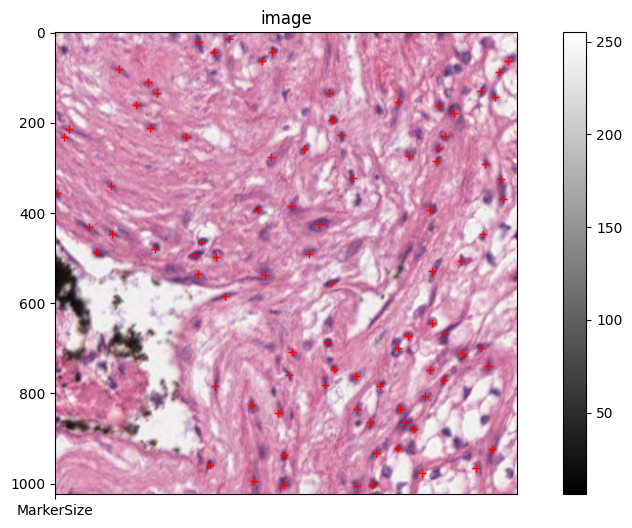

In [6]:
import pandas as pd

image_file = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/images/valid/cell/014.jpg'
csv_file   = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/014.csv'
label_file = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_seg/014.png'

df = pd.read_csv(csv_file, header=None)
df.columns = ['x', 'y', 'class']
arr = df[df['class']==1].values
foreground = [[a[0], a[1]] for a in arr]

reader   = PILReader(converter=lambda im: im.convert("RGB"))
image_np = LoadImage(image_only=True, dtype=np.uint8, reader=reader)(image_file)

print(f"Image: {image_np.shape}\nForeground Points: {foreground}")
show_image(image_np, guidance=[foreground])

In [2]:
# 가볍게 저장
import torch
for i in list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_LDCTIQA/checkpoints/230723_MaxViT_UNet_CLS_REC_Skip/epoch_*_checkpoint.pth')):
    torch.save({'model_state_dict': torch.load(i)['model_state_dict']}, i)

In [1]:
import re
import glob

def list_sort_nicely(l):
    def convert(text): return int(text) if text.isdigit() else text
    def alphanum_key(key): return [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

In [ ]:
import cv2
import glob
import pandas as pd
from skimage.morphology import binary_dilation, binary_erosion, disk

save_root  = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/'
image_file_list = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/images/valid/cell/*.jpg'))
csv_file_list   = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/*.csv'))


pre_transforms = Compose([
    LoadImaged(keys="image", dtype=np.uint8, reader=PILReader(converter=lambda im: im.convert("RGB"))),
    EnsureChannelFirstd(keys="image"),
    ScaleIntensityRanged(keys="image", a_min=0.0, a_max=255.0, b_min=-1.0, b_max=1.0),
    AddClickSignalsd(image="image", foreground="foreground", gaussian=False),
])

# Transforms
post_transforms = Compose([
    Activationsd(keys="pred", sigmoid=True),
    AsDiscreted(keys="pred", threshold=0.5, dtype=np.uint8),
    SqueezeDimd(keys="pred", dim=1),
    PostFilterLabeld(keys="pred"),
])


for i, j in zip(image_file_list, csv_file_list):

    try:
        df = pd.read_csv(j, header=None)
        df.columns = ['x', 'y', 'class']
        arr = df[df['class']==1].values
        foreground = [[a[0], a[1]] for a in arr]

        data = {"image": i, "foreground": foreground}
        data = pre_transforms(data)

        network.eval()
        with torch.no_grad():
            pred = network(data["image"])

        data["pred"] = pred
        data = post_transforms(data)

        # flip and rotate 90 degree
        pred = data["pred"]

        # dilation and erosion
        pred = binary_erosion(pred, disk(3))
        pred = binary_dilation(pred, disk(3))

        pred = pred.astype(np.uint8)
        pred = np.expand_dims(pred, axis=-1)

        # flip and rotate 90 degree    
        pred = np.flip(pred, axis=1)
        pred = np.rot90(pred, k=1)
        pred = pred.squeeze()

        # data['pred']를 cv2 gray scale로 저장
        cv2.imwrite(save_root+'cell_seg_monai/idx1_' + i.split('/')[-1].replace('.jpg', '.png'), pred.astype(np.uint8)*255)

    except:
        # data['pred']를 cv2 gray scale로 저장
        cv2.imwrite(save_root+'cell_seg_monai/idx1_' + i.split('/')[-1].replace('.jpg', '.png'), np.zeros((1024, 1024)).astype(np.uint8))


In [ ]:
import cv2
import glob
import pandas as pd
from skimage.morphology import binary_dilation, binary_erosion, disk

save_root  = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/'
image_file_list = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/images/valid/cell/*.jpg'))
csv_file_list   = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/*.csv'))



pre_transforms = Compose([
    LoadImaged(keys="image", dtype=np.uint8, reader=PILReader(converter=lambda im: im.convert("RGB"))),
    EnsureChannelFirstd(keys="image"),
    ScaleIntensityRanged(keys="image", a_min=0.0, a_max=255.0, b_min=-1.0, b_max=1.0),
    AddClickSignalsd(image="image", foreground="foreground", gaussian=False),
])

# Transforms
post_transforms = Compose([
    Activationsd(keys="pred", sigmoid=True),
    AsDiscreted(keys="pred", threshold=0.5, dtype=np.uint8),
    SqueezeDimd(keys="pred", dim=1),
    PostFilterLabeld(keys="pred"),
])


for i, j in zip(image_file_list, csv_file_list):

    try:
        df = pd.read_csv(j, header=None)
        df.columns = ['x', 'y', 'class']
        arr = df[df['class']==2].values
        foreground = [[a[0], a[1]] for a in arr]

        data = {"image": i, "foreground": foreground}
        data = pre_transforms(data)

        network.eval()
        with torch.no_grad():
            pred = network(data["image"])

        data["pred"] = pred
        data = post_transforms(data)

        # flip and rotate 90 degree
        pred = data["pred"]

        # dilation and erosion
        pred = binary_erosion(pred, disk(3))
        pred = binary_dilation(pred, disk(3))

        pred = pred.astype(np.uint8)
        pred = np.expand_dims(pred, axis=-1)

        # flip and rotate 90 degree    
        pred = np.flip(pred, axis=1)
        pred = np.rot90(pred, k=1)
        pred = pred.squeeze()

        # data['pred']를 cv2 gray scale로 저장
        cv2.imwrite(save_root+'cell_seg_monai/idx2_' + i.split('/')[-1].replace('.jpg', '.png'), pred.astype(np.uint8)*255)

    except:
        # data['pred']를 cv2 gray scale로 저장
        cv2.imwrite(save_root+'cell_seg_monai/idx2_' + i.split('/')[-1].replace('.jpg', '.png'), np.zeros((1024, 1024)).astype(np.uint8))


# 모나이 mask 합치기

In [ ]:
idx1_file_list = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/train/cell_seg_monai_idx/idx1_*.png'))
idx2_file_list = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/train/cell_seg_monai_idx/idx2_*.png'))

import numpy as np

for i, j in zip(idx1_file_list, idx2_file_list):
    idx1 = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    idx2 = cv2.imread(j, cv2.IMREAD_GRAYSCALE)

    # idx1과 idx2 겹치는 범위 확인
    overlap = np.logical_and(idx1, idx2)

    if overlap.sum() > 0:
        # idx2에서 겹치는 부분을 0으로 만들기
        idx2[overlap] = 0
    
        # print(i)

        # plt.figure(figsize=(12, 6))

        # plt.subplot(131)
        # plt.imshow(idx1)

        # plt.subplot(132)
        # plt.imshow(idx2)    

        # plt.subplot(133)
        # plt.imshow(overlap)        

        # plt.show()

    idx1[idx1 != 0] = 1
    idx2[idx2 != 0] = 2

    obj = idx1+idx2

    obj[obj == 0] = 255

    cv2.imwrite('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/train/cell_seg_monai/' + i.split('_')[-1], obj.astype(np.uint8))        




In [ ]:
idx1_file_list = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_seg_monai_idx/idx1_*.png'))
idx2_file_list = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_seg_monai_idx/idx2_*.png'))

import numpy as np

for i, j in zip(idx1_file_list, idx2_file_list):
    idx1 = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    idx2 = cv2.imread(j, cv2.IMREAD_GRAYSCALE)

    # idx1과 idx2 겹치는 범위 확인
    overlap = np.logical_and(idx1, idx2)

    if overlap.sum() > 0:
        # idx2에서 겹치는 부분을 0으로 만들기
        idx2[overlap] = 0
    
        # print(i)

        # plt.figure(figsize=(12, 6))

        # plt.subplot(131)
        # plt.imshow(idx1)

        # plt.subplot(132)
        # plt.imshow(idx2)    

        # plt.subplot(133)
        # plt.imshow(overlap)        

        # plt.show()

    idx1[idx1 != 0] = 1
    idx2[idx2 != 0] = 2

    obj = idx1+idx2

    obj[obj == 0] = 255

    cv2.imwrite('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_seg_monai/' + i.split('_')[-1], obj.astype(np.uint8))        




In [ ]:
np.mean(np.array(16165))

# disk(7) + 모나이 라벨

In [5]:
import re
import glob

def list_sort_nicely(l):
    def convert(text): return int(text) if text.isdigit() else text
    def alphanum_key(key): return [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

In [ ]:
import matplotlib.pyplot as plt
from scipy.ndimage.measurements import label

for i in range(3):
    plt.figure(figsize=(12, 6))
    
    labeled_array, num_features = label(b[..., i])
    print("monai seg == ", num_features)
    plt.subplot(121)
    plt.imshow(labeled_array)

    labeled_array, num_features = label(a[..., i])
    print("seg == ", num_features)
    plt.subplot(122)
    plt.imshow(labeled_array)
    plt.show()

In [64]:
import numpy as np
from scipy.ndimage import label, sum


def count_clusters(image):
    # 이미지를 numpy 배열로 변환
    img_array = np.array(image)
    
    # 라벨링 실행
    labeled_array, num_features = label(img_array)
    
    return num_features


def remove_small_clusters(img_array, target_count):
    # 라벨링 실행
    labeled_array, num_features = label(img_array)

    # 각 덩어리의 크기를 측정
    sizes = sum(img_array, labeled_array, range(1, num_features+1))

    # 덩어리의 크기와 라벨을 함께 정렬
    sorted_clusters = sorted([(size, i+1) for i, size in enumerate(sizes)])

    # 덩어리의 갯수가 목표 갯수가 될 때까지 가장 작은 덩어리부터 제거
    for size, cluster in sorted_clusters:
        if num_features <= target_count:
            break
        labeled_array[labeled_array == cluster] = 0
        num_features -= 1

    return (labeled_array > 0).astype(np.uint8)


def keep_largest_cluster(image):

    image_list = []
    for i in image:
        img_array = i.numpy()
        # 라벨링 실행
        labeled_array, num_features = label(img_array)

        # 각 덩어리의 크기를 측정
        sizes = sum(img_array, labeled_array, range(1, num_features+1))

        # 가장 큰 덩어리의 라벨을 찾음
        largest_cluster_label = np.argmax(sizes) + 1

        # 가장 큰 덩어리만 남기고 나머지를 제거
        binary_array = (labeled_array == largest_cluster_label).astype(np.uint8)

        image_list.append(torch.tensor(binary_array))

    return torch.stack(image_list, dim=0)


def smoothing_shape(image):
    image_list = []
    for i in image:
        img_array = i.numpy()

        img_array = binary_dilation(img_array, disk(9))
        img_array = binary_erosion(img_array, disk(9))
        img_array = binary_erosion(img_array, disk(7))
        
        image_list.append(torch.tensor(img_array))
        
    return torch.stack(image_list, dim=0)


In [65]:
from monai.transforms import MapTransform
from monai.config import KeysCollection, NdarrayOrTensor
from monai.utils import StrEnum

class NuclickKeys(StrEnum):

    IMAGE = "image"
    LABEL = "label"
    OTHERS = "others"  # key of other labels from the binary mask which are not being used for training
    FOREGROUND = "foreground"

    CENTROID = "centroid"  # key where the centroid values are stored
    MASK_VALUE = "mask_value"
    LOCATION = "location"

    NUC_POINTS = "nuc_points"
    BOUNDING_BOXES = "bounding_boxes"
    IMG_HEIGHT = "img_height"
    IMG_WIDTH = "img_width"
    PRED_CLASSES = "pred_classes"
    

class PostFilterLabeld(MapTransform):
    def __init__(
        self,
        keys: KeysCollection,
        nuc_points: str = NuclickKeys.NUC_POINTS,
        bounding_boxes: str = NuclickKeys.BOUNDING_BOXES,
        img_height: str = NuclickKeys.IMG_HEIGHT,
        img_width: str = NuclickKeys.IMG_WIDTH,
        thresh: float = 0.33,
        min_size: int = 10,
        min_hole: int = 30,
        do_reconstruction: bool = False,
        allow_missing_keys: bool = False,
        pred_classes: str = NuclickKeys.PRED_CLASSES,
    ):
        super().__init__(keys, allow_missing_keys)
        self.nuc_points = nuc_points
        self.bounding_boxes = bounding_boxes
        self.img_height = img_height
        self.img_width = img_width

        self.thresh = thresh
        self.min_size = min_size
        self.min_hole = min_hole
        self.do_reconstruction = do_reconstruction
        self.pred_classes = pred_classes

    def __call__(self, data):
        d = dict(data)

        pred_classes = d.get(self.pred_classes)
        bounding_boxes = d[self.bounding_boxes]
        x = d[self.img_width]
        y = d[self.img_height]

        for key in self.keys:
            label = d[key].astype(np.uint8)
            masks = self.post_processing(label, self.thresh, self.min_size, self.min_hole)
            d[key] = self.gen_instance_map(masks, bounding_boxes, x, y, pred_classes=pred_classes).astype(np.uint8)
        return d

    def post_processing(self, preds, thresh=0.33, min_size=10, min_hole=30):
        masks = preds > thresh
        # for i in range(preds.shape[0]):
        #     masks[i] = morphology.remove_small_objects(masks[i], min_size=min_size)
        #     masks[i] = morphology.remove_small_holes(masks[i], area_threshold=min_hole)
        return masks

    def gen_instance_map(self, masks, bounding_boxes, x, y, flatten=True, pred_classes=None):
        instance_map = np.zeros((x, y), dtype=np.uint16)
        for i, mask in enumerate(masks):
            bb = bounding_boxes[i]
            c = pred_classes[i] if pred_classes and i < len(pred_classes) else 1
            c = c if flatten else i + 1

            this_map = instance_map[bb[0] : bb[2], bb[1] : bb[3]]
            this_map = np.where(mask > 0, c, this_map)
            instance_map[bb[0] : bb[2], bb[1] : bb[3]] = this_map

        return instance_map

In [69]:
import cv2
import glob
import pandas as pd
from skimage.morphology import binary_dilation, binary_erosion, disk, remove_small_objects


save_root  = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/'
image_file_list = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/images/valid/cell/*.jpg'))
csv_file_list   = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/*.csv'))
cell_seg_list   = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_seg/*.png'))


pre_transforms = Compose([
    LoadImaged(keys="image", dtype=np.uint8, reader=PILReader(converter=lambda im: im.convert("RGB"))),
    EnsureChannelFirstd(keys="image"),
    ScaleIntensityRanged(keys="image", a_min=0.0, a_max=255.0, b_min=-1.0, b_max=1.0),
    AddClickSignalsd(image="image", foreground="foreground", gaussian=False),
])

# Transforms
post_transforms = Compose([
    Activationsd(keys="pred", sigmoid=True),
    AsDiscreted(keys="pred", threshold=0.5, dtype=np.uint8),
    SqueezeDimd(keys="pred", dim=1),

    Lambdad(keys="pred", func=keep_largest_cluster),
    Lambdad(keys="pred", func=smoothing_shape),
    Lambdad(keys="pred", func=keep_largest_cluster),
    PostFilterLabeld(keys="pred", min_size=0, min_hole=0),
])


df = pd.read_csv(csv_file_list[6], header=None)
df.columns = ['x', 'y', 'class']
arr = df[df['class']==2].values
foreground = [[a[0], a[1]] for a in arr]

data = {"image": image_file_list[6], "foreground": foreground}
data = pre_transforms(data)

network.eval()
with torch.no_grad():
    pred = network(data["image"])

data["pred"] = pred
data = post_transforms(data)

# # flip and rotate 90 degree
pred = data["pred"]
pred = pred.astype(np.uint8)
pred = np.expand_dims(pred, axis=-1)

# flip and rotate 90 degree    
pred = np.flip(pred, axis=1)
pred = np.rot90(pred, k=1)
pred = pred.squeeze()

##### 
cell_seg = cv2.imread(cell_seg_list[6], cv2.IMREAD_GRAYSCALE)
cell_seg = (cell_seg == 2)
overlap = np.logical_or(pred, cell_seg)
print("real points == ", len(data['foreground']))
labeled_array, num_features = label(cell_seg)
sizes = np.bincount(labeled_array.flatten())
overlap = remove_small_objects(overlap, min_size=min(sizes))
print("monai points == ", count_clusters(overlap))

RuntimeError: applying transform <monai.transforms.utility.dictionary.Lambdad object at 0x7f255a466940>

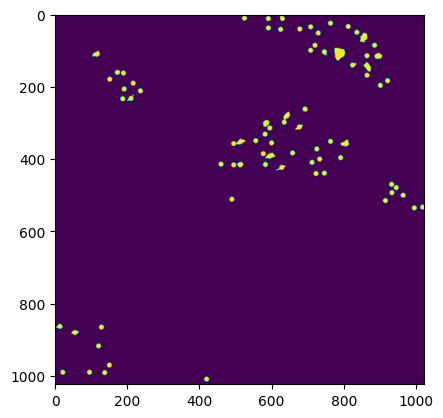

In [67]:
plt.imshow(overlap)

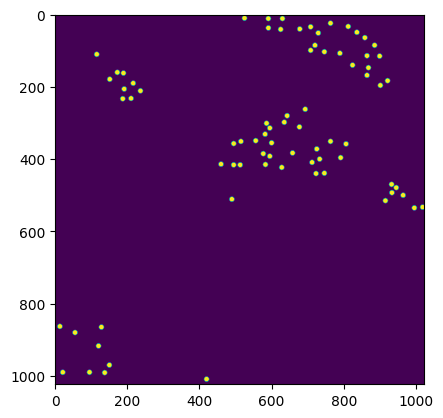

In [68]:
plt.imshow(cell_seg)

In [8]:
import cv2
import glob
import pandas as pd
from skimage.morphology import binary_dilation, binary_erosion, disk

save_root  = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/'
image_file_list = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/images/valid/cell/*.jpg'))
csv_file_list   = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/*.csv'))
cell_seg_list   = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_seg/*.png'))


pre_transforms = Compose([
    LoadImaged(keys="image", dtype=np.uint8, reader=PILReader(converter=lambda im: im.convert("RGB"))),
    EnsureChannelFirstd(keys="image"),
    ScaleIntensityRanged(keys="image", a_min=0.0, a_max=255.0, b_min=-1.0, b_max=1.0),
    AddClickSignalsd(image="image", foreground="foreground", gaussian=False),
])

# Transforms
post_transforms = Compose([
    Activationsd(keys="pred", sigmoid=True),
    AsDiscreted(keys="pred", threshold=0.5, dtype=np.uint8),
    SqueezeDimd(keys="pred", dim=1),

    Lambdad(keys="pred", func=keep_largest_cluster),
    Lambdad(keys="pred", func=smoothing_shape),

    PostFilterLabeld(keys="pred", min_size=0, min_hole=0),
])


label_index = 2


for i, j, k in zip(image_file_list, csv_file_list, cell_seg_list):
    
    try:
        df = pd.read_csv(j, header=None)
        df.columns = ['x', 'y', 'class']
        arr = df[df['class']==label_index].values
        foreground = [[a[0], a[1]] for a in arr]

        data = {"image": i, "foreground": foreground}
        data = pre_transforms(data)

        network.eval()
        with torch.no_grad():
            pred = network(data["image"])

        data["pred"] = pred
        data = post_transforms(data)
        
        # flip and rotate 90 degree
        pred = data["pred"]
        pred = pred.astype(np.uint8)
        pred = np.expand_dims(pred, axis=-1)

        # flip and rotate 90 degree    
        pred = np.flip(pred, axis=1)
        pred = np.rot90(pred, k=1)
        pred = pred.squeeze()

        ##### 
        cell_seg = cv2.imread(k, cv2.IMREAD_GRAYSCALE)
        cell_seg = (cell_seg == label_index)
        overlap = np.logical_or(pred, cell_seg)
        print("real points == ", len(data['foreground']))
        labeled_array, num_features = label(cell_seg)
        sizes = np.bincount(labeled_array.flatten())
        overlap = remove_small_objects(overlap, min_size=min(sizes)-1)
        print("monai points == ", count_clusters(overlap))

        # data['pred']를 cv2 gray scale로 저장
        # cv2.imwrite(save_root+'cell_seg_monai/idx1_' + i.split('/')[-1].replace('.jpg', '.png'), pred.astype(np.uint8)*255)

    except:
        # data['pred']를 cv2 gray scale로 저장
        # cv2.imwrite(save_root+'cell_seg_monai/idx1_' + i.split('/')[-1].replace('.jpg', '.png'), np.zeros((1024, 1024)).astype(np.uint8))
        pass


real points ==  177
monai points ==  177
real points ==  217
monai points ==  217
real points ==  15
monai points ==  15
real points ==  183
monai points ==  183
real points ==  244
monai points ==  240
real points ==  77
monai points ==  70
real points ==  65
monai points ==  65
real points ==  79
monai points ==  79
real points ==  110
monai points ==  110
real points ==  103
monai points ==  103


In [ ]:
6

In [ ]:
# 1. 가장 작은 덩어리보다는 크게 seg 수정.
# 2. 포인트 갯수를 맞추게 끔 하자.